### **DBSCAN PROBLEM 1**

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")

In [84]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [150]:
print("Dataset shape:", data.shape)

Dataset shape: (200, 5)


In [151]:
# checking for NULL data in the dataset
data.isnull().any().any()

False

In [152]:
# extracting the above mentioned columns
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values

In [155]:
df=data.iloc[:,[3,4]].values

In [156]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [157]:
df

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [158]:
print(df.shape)

(200, 2)


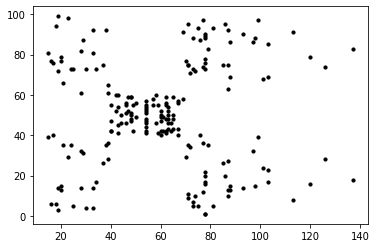

In [179]:
plt.scatter(df[:,0],df[:,1],s=10,c="black")

**Find** **Optimal** **number** **of** **clusters**

In [180]:
from sklearn.cluster import KMeans

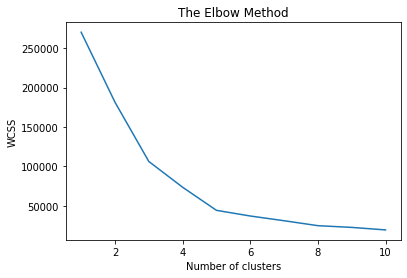

In [181]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,
  init='k-means++',max_iter=300,n_init=10)#init -- >calculate distance from the centre
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [162]:
from sklearn.cluster import DBSCAN

In [182]:
dbscan = DBSCAN(eps = 5, min_samples = 5)

In [183]:
labels = dbscan.fit_predict(df)

In [184]:
np.unique(labels)# -1 value noises not cluster

array([-1,  0,  1,  2,  3,  4])

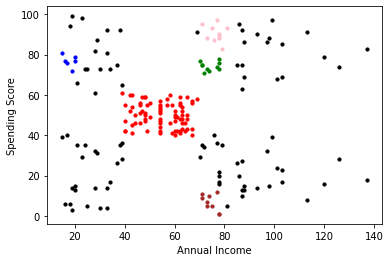

In [185]:
#Visvalising the clusters
plt.scatter(df[labels==-1,0],df[labels==-1,1] ,s=10,c='black')
plt.scatter(df[labels==0,0],df[labels==0,1] ,s=10,c='blue')
plt.scatter(df[labels==1,0],df[labels==1,1] ,s=10,c='red')
plt.scatter(df[labels==2,0],df[labels==2,1] ,s=10,c='green')
plt.scatter(df[labels==3,0],df[labels==3,1] ,s=10,c='brown')
plt.scatter(df[labels==4,0],df[labels==4,1] ,s=10,c='pink')
plt.scatter(df[labels==5,0],df[labels==5,1] ,s=10,c='yellow')
plt.scatter(df[labels==6,0],df[labels==6,1] ,s=10,c='silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()



# **DBSCAN PROBLEM 2**

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [187]:
data = {'x': [2,2,8,5,7,6,1,4],
        'y': [10,5,4,8,5,4,2,9],
}
df1 = pd.DataFrame(data,columns=['x','y'])
df1=df1.values
print(df1)

[[ 2 10]
 [ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]]


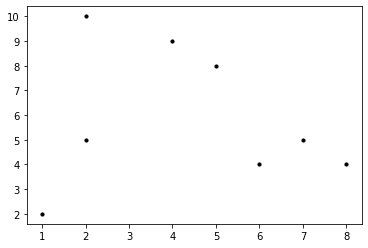

In [188]:
plt.scatter(df1[:,0],df1[:,1],s=10,c="black")

In [189]:
from sklearn.cluster import KMeans

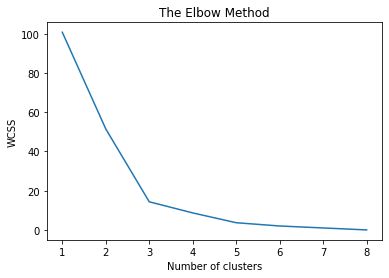

In [190]:
wcss=[]
for i in range(1,9):
  kmeans=KMeans(n_clusters=i,
  init='k-means++',max_iter=300,n_init=10)#init -- >calculate distance from the centre
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,9),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [191]:
from sklearn.cluster import DBSCAN

In [192]:
dbscan = DBSCAN(eps = 2, min_samples = 3)

In [193]:
labels = dbscan.fit_predict(df1)

In [194]:
np.unique(labels)# -1 value noises not cluster

array([-1,  0])

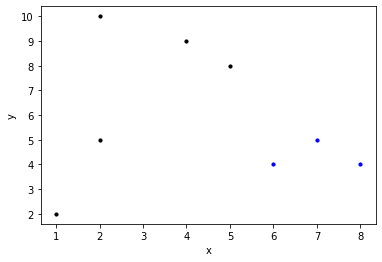

In [195]:
#Visvalising the clusters
plt.scatter(df1[labels==-1,0],df1[labels==-1,1] ,s=10,c='black')
plt.scatter(df1[labels==0,0],df1[labels==0,1] ,s=10,c='blue')
plt.scatter(df1[labels==1,0],df1[labels==1,1] ,s=10,c='red')
plt.scatter(df1[labels==2,0],df1[labels==2,1] ,s=10,c='green')
plt.scatter(df1[labels==3,0],df1[labels==3,1] ,s=10,c='brown')
plt.scatter(df1[labels==4,0],df1[labels==4,1] ,s=10,c='pink')
plt.scatter(df1[labels==5,0],df1[labels==5,1] ,s=10,c='yellow')
plt.scatter(df1[labels==6,0],df1[labels==6,1] ,s=10,c='silver')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **DBSCAN PROBLEM 3**

In [196]:
Data = {'x': [3,4,5,6,7,6,7,8,3,2,3,2],
        'y': [7,6,5,4,3,2,2,4,3,6,5,4],
}
  
df = pd.DataFrame(Data,columns=['x','y'])
print(df)


    x  y
0   3  7
1   4  6
2   5  5
3   6  4
4   7  3
5   6  2
6   7  2
7   8  4
8   3  3
9   2  6
10  3  5
11  2  4


Text(0.5, 1.0, 'DATA')

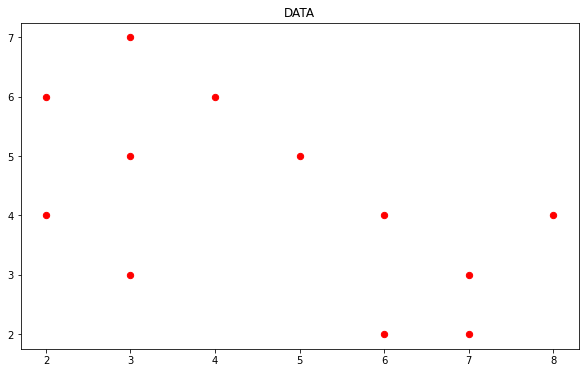

In [197]:
# Set the size of the plot
plt.figure(figsize=(10,6))
plt.scatter(df['x'], df['y'], c="red", s=40)
plt.title('DATA')

In [198]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 1.9, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

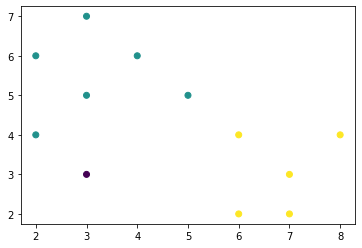

In [199]:
# Plot the clusters
plt.scatter(df['x'], df['y'], c = labels) # plotting the clusters
plt.show() # showing the plot